In [ ]:
import tensorflow as tf
import keras
import pandas as pd
import numpy as np
import zipfile
import os
from random import randint
from keras.layers import Dense,Flatten,MaxPool2D,Conv2D,Dropout,GlobalAveragePooling2D
from keras.losses import binary_crossentropy,categorical_crossentropy
from keras.models import Model,Sequential
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import load_img,img_to_array

In [ ]:
image_generator = ImageDataGenerator(validation_split=0.2,rescale = 1./255)
train_data_gen = image_generator.flow_from_directory(directory='/content/drive/MyDrive/Dataset/natural_images',
                                                     subset='training',target_size=(100,100),class_mode='categorical')
val_data_gen = image_generator.flow_from_directory(directory='/content/drive/MyDrive/Dataset/natural_images',
                                                   subset='validation',target_size=(100,100),class_mode='categorical')

Found 5525 images belonging to 8 classes.
Found 1378 images belonging to 8 classes.


##1. Simple CNN model

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64,(3,3),activation='relu',input_shape = (100,100,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(8,activation='softmax')

])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 23, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 16928)             0         
                                                                 
 dense (Dense)               (None, 512)               8

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='RMSprop',metrics=['accuracy'])


In [ ]:
history = model.fit(train_data_gen,epochs =10,validation_data = val_data_gen,batch_size=10 ,verbose=1)

Epoch 1/10
173/173 [==============================] - 118s 682ms/step - loss: 0.1140 - accuracy: 0.9893 - val_loss: 0.7929 - val_accuracy: 0.9107
Epoch 2/10
173/173 [==============================] - 118s 682ms/step - loss: 0.0953 - accuracy: 0.9904 - val_loss: 1.0720 - val_accuracy: 0.9035
Epoch 3/10
173/173 [==============================] - 119s 687ms/step - loss: 0.0905 - accuracy: 0.9884 - val_loss: 1.7061 - val_accuracy: 0.8846
Epoch 4/10
173/173 [==============================] - 120s 693ms/step - loss: 0.0668 - accuracy: 0.9897 - val_loss: 1.0870 - val_accuracy: 0.9086
Epoch 5/10
173/173 [==============================] - 120s 692ms/step - loss: 0.0688 - accuracy: 0.9922 - val_loss: 2.1556 - val_accuracy: 0.8643
Epoch 6/10
173/173 [==============================] - 120s 694ms/step - loss: 0.0275 - accuracy: 0.9960 - val_loss: 1.1690 - val_accuracy: 0.9100
Epoch 7/10
173/173 [==============================] - 119s 689ms/step - loss: 0.0830 - accuracy: 0.9899 - val_loss: 1.1036 -

<Figure size 432x288 with 0 Axes>

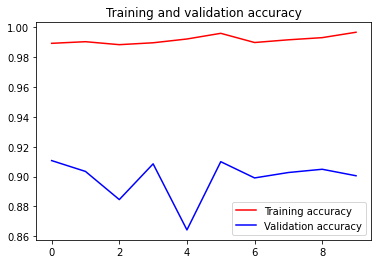

<Figure size 432x288 with 0 Axes>

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
# plt.plot(epochs, loss, 'r', label='Training loss')
# plt.plot(epochs, val_loss, 'g', label='Validation loss')
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

##2. CNN with Data Augmentation and Normalization

In [ ]:
image_generator = ImageDataGenerator(validation_split=0.2,
                                     rescale = 1./255,
                                     rotation_range=40,
                                     width_shift_range=0.2,
                                     height_shift_range=0.2,
                                     shear_range=0.2,
                                     zoom_range=0.2,
                                     horizontal_flip=True,
                                     fill_mode='nearest')
train_data_gen = image_generator.flow_from_directory(directory='/content/drive/MyDrive/Dataset/natural_images',
                                                     subset='training',target_size=(100,100),class_mode='categorical')
val_data_gen = image_generator.flow_from_directory(directory='/content/drive/MyDrive/Dataset/natural_images',
                                                   subset='validation',target_size=(100,100),class_mode='categorical')

Found 5525 images belonging to 8 classes.
Found 1378 images belonging to 8 classes.


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64,(3,3),activation='relu',input_shape = (100,100,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(8,activation='softmax')

])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 23, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 16928)             0         
                                                                 
 dense (Dense)               (None, 512)               8

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='RMSprop',metrics=['accuracy'])

In [ ]:
history = model.fit(train_data_gen,epochs =10,validation_data = val_data_gen,batch_size=10 ,verbose=1)

Epoch 1/10
173/173 [==============================] - 2857s 16s/step - loss: 1.4385 - accuracy: 0.4930 - val_loss: 0.8957 - val_accuracy: 0.6974
Epoch 2/10
173/173 [==============================] - 44s 257ms/step - loss: 0.8168 - accuracy: 0.7068 - val_loss: 0.8284 - val_accuracy: 0.7170
Epoch 3/10
173/173 [==============================] - 44s 255ms/step - loss: 0.7120 - accuracy: 0.7488 - val_loss: 0.7318 - val_accuracy: 0.7482
Epoch 4/10
173/173 [==============================] - 44s 255ms/step - loss: 0.6479 - accuracy: 0.7712 - val_loss: 1.0150 - val_accuracy: 0.6205
Epoch 5/10
173/173 [==============================] - 44s 256ms/step - loss: 0.5880 - accuracy: 0.7910 - val_loss: 0.6579 - val_accuracy: 0.7736
Epoch 6/10
173/173 [==============================] - 44s 255ms/step - loss: 0.5273 - accuracy: 0.8161 - val_loss: 0.8298 - val_accuracy: 0.7344
Epoch 7/10
173/173 [==============================] - 44s 252ms/step - loss: 0.5122 - accuracy: 0.8237 - val_loss: 0.5673 - val_ac

<Figure size 432x288 with 0 Axes>

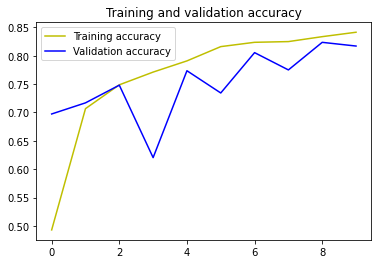

<Figure size 432x288 with 0 Axes>

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'y', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

##3. CNN with Dropout

In [ ]:
image_generator = ImageDataGenerator(validation_split=0.2,
                                     rotation_range=40,
                                     width_shift_range=0.2,
                                     height_shift_range=0.2,
                                     shear_range=0.2,
                                     zoom_range=0.2,
                                     horizontal_flip=True,
                                     fill_mode='nearest')
train_data_gen = image_generator.flow_from_directory(directory='/content/drive/MyDrive/Dataset/natural_images',
                                                     subset='training',target_size=(100,100),class_mode='categorical')
val_data_gen = image_generator.flow_from_directory(directory='/content/drive/MyDrive/Dataset/natural_images',
                                                   subset='validation',target_size=(100,100),class_mode='categorical')



Found 5525 images belonging to 8 classes.
Found 1378 images belonging to 8 classes.


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64,(3,3),activation='relu',input_shape = (100,100,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(8,activation='softmax')

])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 98, 98, 64)        1792      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 49, 49, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 47, 47, 32)        18464     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 23, 23, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 16928)             0         
                                                                 
 dense_3 (Dense)             (None, 512)              

In [ ]:
from tensorflow.keras.optimizers import RMSprop
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
history = model.fit(train_data_gen,epochs =10,validation_data = val_data_gen,batch_size=10 ,verbose=1)

Epoch 1/10
173/173 [==============================] - 45s 254ms/step - loss: 8.8881 - accuracy: 0.2702 - val_loss: 1.8285 - val_accuracy: 0.3048
Epoch 2/10
173/173 [==============================] - 44s 253ms/step - loss: 1.7112 - accuracy: 0.3683 - val_loss: 1.6203 - val_accuracy: 0.3948
Epoch 3/10
173/173 [==============================] - 44s 254ms/step - loss: 1.6199 - accuracy: 0.4033 - val_loss: 1.4649 - val_accuracy: 0.4216
Epoch 4/10
173/173 [==============================] - 43s 250ms/step - loss: 1.5338 - accuracy: 0.4273 - val_loss: 1.5820 - val_accuracy: 0.3897
Epoch 5/10
173/173 [==============================] - 44s 254ms/step - loss: 1.4980 - accuracy: 0.4465 - val_loss: 1.2682 - val_accuracy: 0.5305
Epoch 6/10
173/173 [==============================] - 43s 250ms/step - loss: 1.3731 - accuracy: 0.5144 - val_loss: 1.3688 - val_accuracy: 0.5327
Epoch 7/10
173/173 [==============================] - 43s 250ms/step - loss: 1.3274 - accuracy: 0.5138 - val_loss: 1.3450 - val_ac

<Figure size 432x288 with 0 Axes>

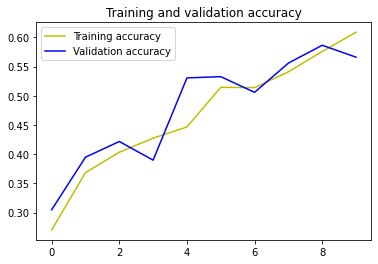

<Figure size 432x288 with 0 Axes>

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'y', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

In [ ]:
model.save_weights("abc.h5")

In [ ]:
savedModel = model.load_weights("abc.h5")